# CS273A Homework 1 
### Due: Monday, October 6th 2025 (11:59 PM)
#### Completed by: Vincent Tran

---
## Instructions

Welcome to CS 273A!


This homework (and many subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.


Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to modify these starter Jupyter notebooks to complete your assignment and to write your report. You may add additional cells (containing either code or text) as needed. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

Several problems in this assignment require you to create plots. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`. Unless you are told otherwise, you should call `pyplot` plotting functions with their default arguments.
 
If you have any questions/concerns about the homework problems or using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or Latex to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: Exploring a NYC Housing Dataset (25 points)
    - Problem 1.1: Numpy Arrays (5 points)
    - Problem 1.2: Feature Statistics (5 points)
    - Problem 1.3: Logical Indexing (5 points)
    - Problem 1.4: Histograms (5 points)
    - Problem 1.5: Scatter Plots (5 points)
- Problem 2: Building a Nearest Centroid Classifier (35 points)
    - Problem 2.1: Implementing Nearest Centroids (20 points)
    - Problem 2.2: Evaluating Nearest Centroids (15 points)
- Problem 3: Decision Boundaries (15 points)
    - Problem 3.1: Visualize 2D Centroid Classifier (5 points)
    - Problem 3.2: Visualize 2D Gaussian Bayes Classifier (5 points)
    - Problem 3.3: Analysis (5 points)
- Problem 4: MNIST data (20 points)
    - Problem 4.1: Training the model (5 points)
    - Problem 4.2: Visualizing the centroids (5 points)
    - Problem 4.3: Error rate and confusion matrix (10 points)
- Statement of Collaboration (5 points)

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=123`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

In [1]:
# If you haven't installed numpy, pyplot, scikit, etc., do so:
!pip install -U scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import zero_one_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

import requests           # we'll use these for reading data from a url
from io import StringIO

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 123
np.random.seed(seed)  

## Problem 1: Exploring a NYC Housing Dataset

In this problem, you will explore some basic data manipulation and visualizations with a small dataset of real estate prices from NYC. For every datapoint, we are given several real-valued features which will be used to predict the target variable, y, representing in which borough the property is located. Let's first load in the dataset by running the code cell below:

In [3]:
# Load the features and labels from an online text file
url = 'https://ics.uci.edu/~ihler/classes/cs273/data/nyc_housing.txt'
with requests.get(url) as link:
    datafile = StringIO(link.text)
    nych = np.genfromtxt(datafile,delimiter=',')
    nych_X, nych_y = nych[:,:-1], nych[:,-1]

These data correspond to (a small subset of) property sales in New York in 2014. The target, $y$, represents the borough in which the property was located (0: Manhattan; 1: Bronx; 2: Staten Island).  The observed features correspond to the property size (square feet), price (USD), and year built; the first two features have been log2-transformed (e.g., $x_1 = \log_2(\textrm{size})$) for convenience.

### Problem 1.1 (5 points): Numpy Arrays

The variable `nych_X` is a numpy array containing the feature vectors in our dataset, and `nych_y` is a numpy array containing the corresponding labels.

- What is the shape of `nych_X` and `nych_y`? ([Hint](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html))
- How many datapoints are in our dataset, and how many features does each datapoint have? 
- How many different classes (i.e. labels)  are there? 
- Print rows 3, 4, 5, and 6 of the feature matrix and their corresponding labels. Since Python is zero-indexed, we will count our rows starting at zero -- for example, by "row 0" we mean `nych_X[0, :]`, and "row 1" means `nych_X[1, :]`, etc. (Hint: you can do this in two lines of code with slicing).


In [4]:
# What is the shape of nych_X and nych_y? 
print(f'Shape of nych_X: {nych_X.shape}')
print(f'Shape of nych_y: {nych_y.shape}')
print('-' * 25)

# How many datapoints are in our dataset, and how many features does each datapoint have?
print(f'Number of datapoints: {nych_X.shape[0]}')
print(f'Number of features: {nych_X.shape[1]}')
print('-' * 25)

# How many different classes (i.e. labels) are there?
num_classes = len(np.unique(nych_y))
print(f'Number of unique classes: {num_classes}')
print('-' * 25)

# Print rows 3, 4, 5, and 6 of the feature matrix and their corresponding labels.
print('Rows 3-6:')
print(nych_X[3:7, :])
print('\nLabels for rows 3-6:')
print(nych_y[3:7])

Shape of nych_X: (300, 3)
Shape of nych_y: (300,)
-------------------------
Number of datapoints: 300
Number of features: 3
-------------------------
Number of unique classes: 3
-------------------------
Rows 3-6:
[[  11.839204   19.416995 1980.      ]
 [  18.517396   25.357833 1973.      ]
 [  11.050529   19.041723 2014.      ]
 [  17.255803   26.280297 1917.      ]]

Labels for rows 3-6:
[2. 1. 2. 0.]


### Problem 1.2 (5 points): Feature Statistics

Let's compute some statistics about our features. You are allowed to use `numpy` to help you with this problem -- for example, you might find some of the `numpy` functions listed [here](https://numpy.org/doc/stable/reference/routines.statistics.html) or [here](https://numpy.org/doc/stable/reference/routines.math.html) useful.

- Compute the mean, variance, and standard deviation of each feature.
- Compute the minimum and maximum value for each feature.

Make sure to print out each of these values, and indicate clearly which value corresponds to which computation.

In [5]:
# Calculate statistics for each feature (axis=0 means column-wise)
mean_vals = np.mean(nych_X, axis=0)
variance_vals = np.var(nych_X, axis=0)
std_dev_vals = np.std(nych_X, axis=0)
min_vals = np.min(nych_X, axis=0)
max_vals = np.max(nych_X, axis=0)

# Print the results in a formatted way
feature_names = ['log2(size)', 'log2(price)', 'year built']
for i in range(len(feature_names)):
    print(f'--- {feature_names[i]} ---')
    print(f'  Mean: {mean_vals[i]:.4f}')
    print(f'  Variance: {variance_vals[i]:.4f}')
    print(f'  Standard Deviation: {std_dev_vals[i]:.4f}')
    print(f'  Minimum: {min_vals[i]:.4f}')
    print(f'  Maximum: {max_vals[i]:.4f}\n')

--- log2(size) ---
  Mean: 14.1184
  Variance: 6.6002
  Standard Deviation: 2.5691
  Minimum: 10.3663
  Maximum: 20.1527

--- log2(price) ---
  Mean: 21.9071
  Variance: 8.8719
  Standard Deviation: 2.9786
  Minimum: 16.8727
  Maximum: 29.1239

--- year built ---
  Mean: 1946.3533
  Variance: 1253.0818
  Standard Deviation: 35.3989
  Minimum: 1893.0000
  Maximum: 2014.0000



### Problem 1.3 (5 points): Logical Indexing

Use numpy's logical (boolean) indexing to extract only those data corresponding to $y=0$ (Manhattan). Then, compute the mean and standard deviation of *only these* data points.
Then, do the same for $y=1$ (Bronx).

Again, print out each of these vectors and indicate clearly which value corresponds to which computation.

In [6]:
boroughs = ['Manhattan', 'Bronx']

for y in range(len(boroughs)):
    mask = (nych_y == y)
    borough_X = nych_X[mask]
    print(f'--- y={y} ({boroughs[y]}) ---')
    print(f'Mean vector: {np.mean(borough_X, axis=0)}')
    print(f'Standard Deviation vector: {np.std(borough_X, axis=0)}\n')

--- y=0 (Manhattan) ---
Mean vector: [  16.1489863    25.07251963 1926.94      ]
Standard Deviation vector: [ 2.19416051  2.09812353 28.14562843]

--- y=1 (Bronx) ---
Mean vector: [  14.60837771   21.4446885  1935.29      ]
Standard Deviation vector: [ 1.89678446  1.99063026 22.96619037]



### Problem 1.4 (5 points):  Feature Histograms

Now, you will visualize the distribution of each feature with histograms.  Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`.

- For every feature in `nych_X`, plot a histogram of the values of the feature. Your plot should consist of a grid of subplots with 1 row and 3 columns.
- Include a title above each subplot to indicate which feature we are plotting. For example, you can call the first feature "Feature 0", the second feature "Feature 1", etc.

Some starter code is provided for you below. (Hint: `axes[0].hist(...)` will create a histogram in the first subplot.)

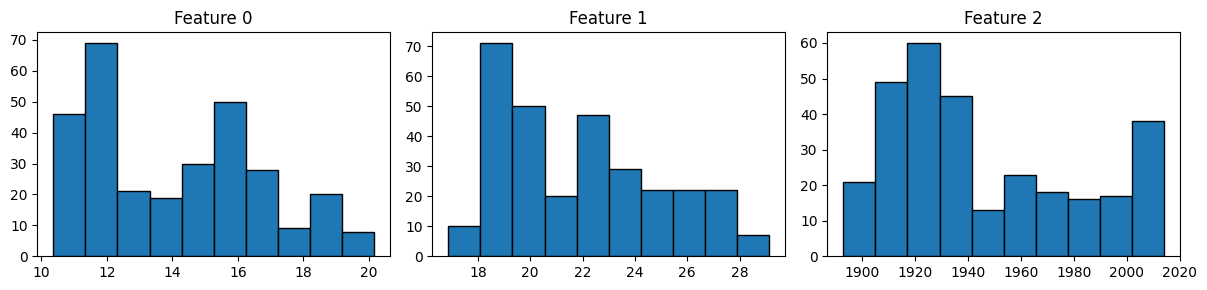

In [7]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  

### YOUR CODE STARTS HERE ###

for i in range(nych_X.shape[1]):
    axes[i].hist(nych_X[:, i], bins='auto', edgecolor='black')
    axes[i].set_title(f'Feature {i}')

###  YOUR CODE ENDS HERE  ###

fig.tight_layout()

### Problem 1.5 (5 points): Feature Scatter Plots

To help further visualize the NYC-Housing datset, you will now create several scatter plots of the features. Use `matplotlib.pyplot` to do this, which is already imported for you as `plt`. Do not use any other plotting libraries, such as `pandas` or `seaborn`.

- For every pair of features in `nych_X`, plot a scatter plot of the feature values, colored according to their labels. For example, plot all data points with $y=0$ as blue, $y=1$ as green, etc. Your plot should be a grid of subplots with 3 rows and 3 columns, with the plot in position $(i,j)$ showing feature $x_i$ versus $x_j$, with the class labels indicated by color. (Hint: `axes[0, 0].scatter(...)` will create a scatter plot in the first column and first row).
- Include an x-label and a y-label on each subplot to indicate which features we are plotting.  For example, you can call the first feature "Feature 0", the second feature "Feature 1", etc. (Hint: `axes[0, 0].set_xlabel(...)` might help you with the first subplot.) 

Some starter code is provided for you below.

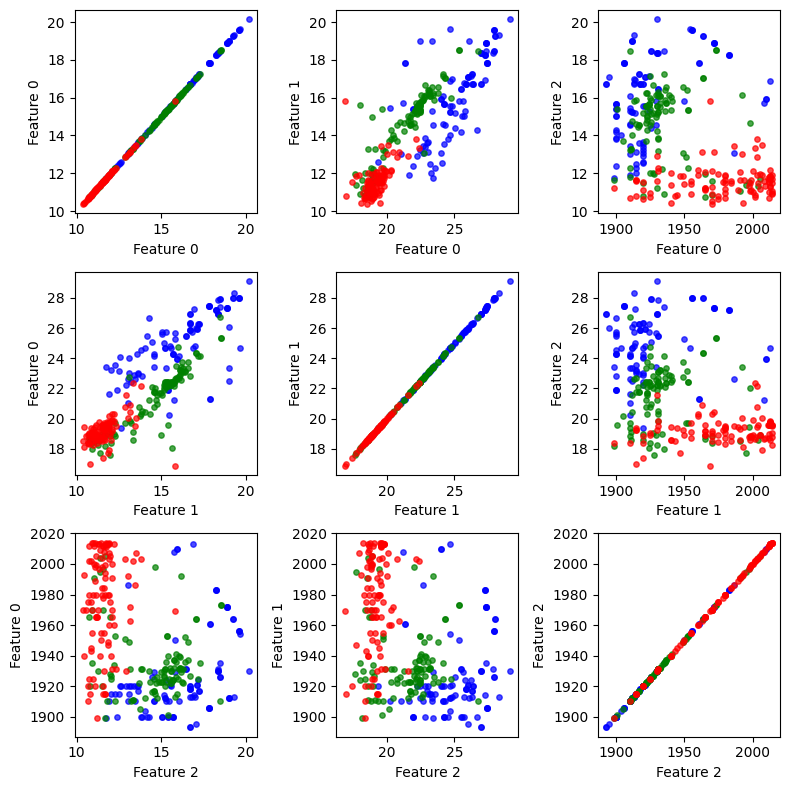

In [8]:
# Create a figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(8, 8))  

### YOUR CODE STARTS HERE ###

colors = ['blue', 'green', 'red']
classes = np.unique(nych_y)
num_features = nych_X.shape[1]

for x in range(num_features):     
    for y in range(num_features):     
        for i, label in enumerate(classes):
            mask = (nych_y == label)
            axes[x, y].scatter(nych_X[mask, y], nych_X[mask, x], 
                               c=colors[i], s=15, alpha=0.7)
        axes[x, y].set_xlabel(f'Feature {x}')
        axes[x, y].set_ylabel(f'Feature {y}')

###  YOUR CODE ENDS HERE  ###

fig.tight_layout()

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

---
## Problem 2: Nearest Centroid Classifiers

In this problem, you will implement a nearest centroid classifier and train it on the NYC data.

### Problem 2.1 (20 points): Implementing a Nearest Centroid Classifier

In the code given below, we define the class `NearestCentroidClassifier` which has an unfinished implementation of a nearest centroid classifier. For this problem, you will complete this implementation. Your nearest centroid classifier will use the Euclidean distance, which is defined for two feature vectors $x$ and $x'$ as

$$d_E(x, x') = \sqrt{\sum_{j=1}^d (x_{j} - x'_{j})^2}. $$

- Implement the method `fit`, which takes in an array of features `X` and an array of labels `y` and trains our classifier. You should store your computed centroids in the list `self.centroids`, and their $y$ values in `self.classes_` (whose name is chosen to match `sklearn` conventions).
- Test your implementation of `fit` by training a `NearestCentroidClassifier` on the NYC data, and printing out the list of centroids. (These should match the means in Problem 1.3.)
- Implement the method `predict`, which takes in an array of feature vectors `X` and predicts their class labels based on the centroids you computed in the method `fit`.
- Print the predicted labels (using your `predict` function) and the true labels for the first ten data points in the NYCH dataset. Make sure to indicate which are the predicted labels and which are the true labels.

You are allowed to modify the given code as necessary to complete the problem, e.g. you may create helper functions. 

In [9]:
class NearestCentroidClassifier:
    def __init__(self):
        # A list containing the centroids; to be filled in with the fit method.
        self.centroids = []
                
    def fit(self, X, y):
        """ Fits the nearest centroid classifier with training features X and training labels y.
        
        X: array of training features; shape (m,n), where m is the number of datapoints,
            and n is the number of features.
        y: array training labels; shape (m, ), where m is the number of datapoints.
        
        """
        # First, identify what possible classes exist in the training data set:
        self.classes_ = np.unique(y)
        
        ### YOUR CODE STARTS HERE ###
        # Hint: you should append to self.centroids with the corresponding centroid for each class.
        # The centroid (mean vector) can be computed in a similar way to P2.2, for example.

        for cls in self.classes_:
            mask = (y == cls)           
            centroid = np.mean(X[mask], axis=0)
            self.centroids.append(centroid)

        ###  YOUR CODE ENDS HERE  ###
        
                    
    def predict(self, X):
        """ Makes predictions with the nearest centroid classifier on the features in X.
        
        X: array of features; shape (m,n), where m is the number of datapoints,
            and n is the number of features.
        
        Returns:
        y_pred: a numpy array of predicted labels; shape (m, ), where m is the number of datapoints.
        """
        y_pred = []
        ### YOUR CODE STARTS HERE ###

        # For each data point we want to predict
        for point in X:
            # Calculate the Euclidean distance from this point to each of the centroids
            # np.linalg.norm(a - b) is a fast way to compute Euclidean distance
            distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
            
            # Find the index of the centroid with the minimum distance
            closest_centroid_idx = np.argmin(distances)
            
            # The predicted class is the class corresponding to that centroid
            predicted_class = self.classes_[closest_centroid_idx]
            y_pred.append(predicted_class)

        ###  YOUR CODE ENDS HERE  ###
        
        return np.array(y_pred)



Here is some code illustrating how to use your `NearestCentroidClassifier`. You can run this code to fit your classifier and to plot the centroids. You should write your implementation above such that you don't need to modify the code in the next cell.  As a sanity check, you should find that the 3rd centroid (for Staten Island) has a "year build" coordinate value of around 1976.8 (i.e., the rightmost column).

In [10]:
nc_classifier = NearestCentroidClassifier()  # Create a NearestCentroidClassifier object
nc_classifier.fit(nych_X, nych_y)            # Fit to the NYC training data

print(nc_classifier.centroids)

[array([  16.1489863 ,   25.07251963, 1926.94      ]), array([  14.60837771,   21.4446885 , 1935.29      ]), array([  11.59781341,   19.20414033, 1976.83      ])]


In [11]:
# Print the predicted and true labels for the first ten data points in the NYCH testing set
### YOUR CODE STARTS HERE ###

y_predictions = nc_classifier.predict(nych_X[:10])

y_true = nych_y[:10]

print('\n--- Prediction Comparison (First 10 Points) ---')
print(f'Predicted Labels: {y_predictions.astype(int)}')
print(f'True Labels:      {y_true.astype(int)}')

###  YOUR CODE ENDS HERE  ###


--- Prediction Comparison (First 10 Points) ---
Predicted Labels: [0 2 0 2 2 2 0 0 2 1]
True Labels:      [1 2 0 2 1 2 0 0 1 1]


### Problem 2.2 (15 points): Evaluating the Nearest Centroids Classifier

Now that you've implemented the nearest centroid classifier, it is time to evaluate its performance.

- Write a function `compute_error_rate` that computes the error rate (fraction of misclassifications) of a model's predictions. That is, your function should take in an array of true labels y and an array of predicted labels `y_pred`, and return the error rate of the predictions. You may use `numpy` to help you do this, but do not use `sklearn` or any other machine learning libraries.
- Write a function `compute_confusion_matrix` that computes the confusion matrix of a model's predictions. That is, your function should  take in an array of true labels `y`and an array of predicted labels `y_pred`, and return the corresponding $C \times C$ confusion matrix as a numpy array, where $C$ is the number of classes. You may use `numpy` to help you do this, but do not use `sklearn` or any other machine learning libraries.
- Verify that your implementations of `NearestCentroidClassifier`, `compute_error_rate`, and `compute_confusion_matrix` are correct. To help you do this, you are given the functions `eval_sklearn_implementation` and `eval_my_implementation`. The function `eval_sklearn_implementation` will use the relevant `sklearn` implementations to compute the error rate and confusion matrix of a nearest centroid classifier. The function `eval_my_implementation` will do the same, but using your implementations. If your code is correct, the outputs of the two functions should be the same.

In [12]:
def compute_error_rate(y, y_pred):
    """ Computes the error rate of an array of predictions.
    
    y: true labels; shape (n, ), where n is the number of datapoints.
    y_pred: predicted labels; shape (n, ), where n is the number of datapoints.
    
    Returns:
    error rate: the error rate of y_pred compared to y; scalar expressed as a decimal (e.g. 0.5)
    """
    ### YOUR CODE STARTS HERE ###

    num_errors = np.sum(y != y_pred)   
    error_rate = num_errors / len(y)

    ###  YOUR CODE ENDS HERE  ###
    
    return error_rate


In [13]:
def compute_confusion_matrix(y, y_pred):
    """ Computes the confusion matrix of an array of predictions.
    
    y: true labels; shape (n, ), where n is the number of datapoints.
    y_pred: predicted labels; shape (n, ), where n is the number of datapoints.
    
    Returns:
    confusion_matrix: a numpy array corresponding to the confusion matrix from y and y_pred; shape (C, C), 
        where C is the number of unique classes.  The (i,j)th entry is the number of examples of class i
        that are classified as being from class j.
    """
    
    ### YOUR CODE STARTS HERE ###

    num_classes = len(np.unique(y))   
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    
    for i in range(len(y)):
        true_label = int(y[i])
        predicted_label = int(y_pred[i])       
        confusion_matrix[true_label, predicted_label] += 1

    ###  YOUR CODE ENDS HERE  ###
    
    return confusion_matrix
    

You can run the two code cells below to compare your answers to the implementations in `sklearn`. If your answers are correct, the outputs of these two functions should be the same. Do not modify the functions `eval_sklearn_implementation` and `eval_my_implementation`, but make sure that you read and understand this code.

Sklearn Results:
--- Error Rate (0/1): 0.3933333333333333


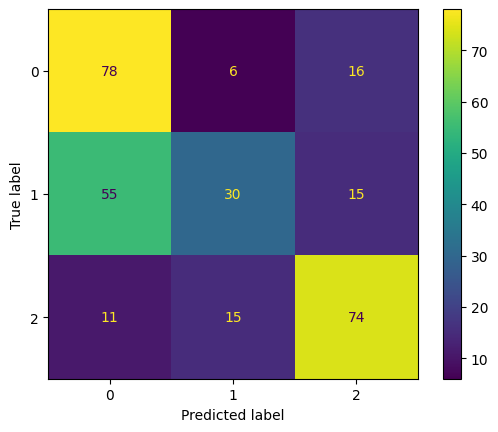

In [14]:
###############################################
### Results with the sklearn implementation ###
###############################################

def eval_sklearn_implementation(X, y):
    # Nearest centroid classifier implemented in sklearn
    sklearn_nearest_centroid = NearestCentroid()

    # Fit on training dataset
    sklearn_nearest_centroid.fit(X, y)

    # Make predictions on training and testing data
    sklearn_y_pred = sklearn_nearest_centroid.predict(X)

    # Evaluate accuracies using the sklearn function accuracy_score
    sklearn_err = zero_one_loss(y, sklearn_y_pred)

    print(f'Sklearn Results:')
    print(f'--- Error Rate (0/1): {sklearn_err}')

    # Evaluate confusion matrix using the sklearn function confusion_matrix
    sklearn_cm = confusion_matrix(y, sklearn_y_pred)
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
    sklearn_disp.plot();
    
    
# Call the function    
eval_sklearn_implementation(nych_X, nych_y)

Your Results:
--- Error Rate (0/1): 0.3933333333333333


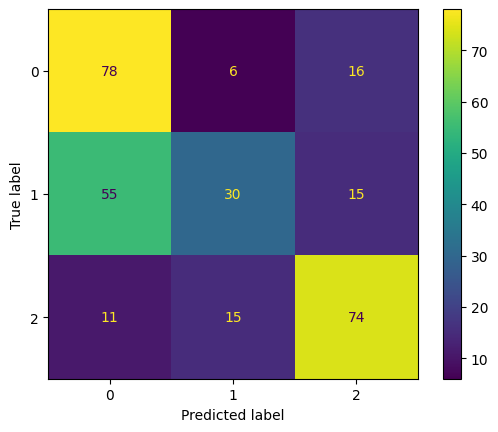

In [15]:
#########################################
### Results with your implementation ###
#########################################

def eval_my_implementation(X, y):
    # Now test your implementation of NearestCentroidClassifier
    nearest_centroid = NearestCentroidClassifier()

    # Fit on training dataset
    nearest_centroid.fit(X, y)

    # Make predictions on training and testing data
    y_pred = nearest_centroid.predict(X)

    # Evaluate accuracies using your function compute_accuracy
    err = zero_one_loss(y, y_pred)

    print(f'Your Results:')
    print(f'--- Error Rate (0/1): {err}')

    # Evaluate confusion matrix using your function compute_confusion_matrix
    cm = compute_confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot();
    

# Call the function
eval_my_implementation(nych_X, nych_y)

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

---
## Problem 3: Decision Boundaries

For the final problem of this homework, you will visualize the decision function and decision boundary of your nearest centroid classifier on 2D data, and compare it to the similar but more flexible Gaussian Bayes classifier discussed in class.  Code for drawing the decision function (which simply evaluates the prediction on a grid) and superimposing the data points is provided.


### Problem 3.1 (5 points): Visualize 2D Centroid Classifier
We will use only the first two features of the NYCH data set, to facilitate visualization.

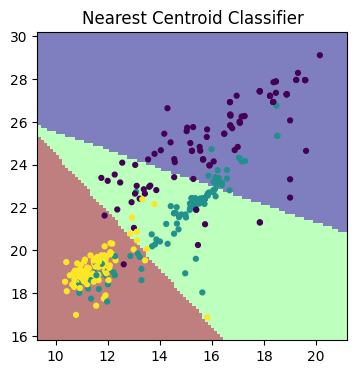

In [16]:
# Plot the decision boundary for your classifier

# Some keyword arguments for making nice looking plots.
plot_kwargs = {'cmap': 'jet',     # another option: viridis
               'response_method': 'predict',
               'plot_method': 'pcolormesh',
               'shading': 'auto',
               'alpha': 0.5,
               'grid_resolution': 100}

figure, axes = plt.subplots(1, 1, figsize=(4,4))

learner = NearestCentroidClassifier() 

### YOUR CODE STARTS HERE ###

nych_X2 = nych_X[:, :2]      # get just the first two features of X
learner.fit(nych_X2, nych_y) # Fit "learner" to nych 2-feature data

###  YOUR CODE ENDS HERE  ###

DecisionBoundaryDisplay.from_estimator(learner, nych_X2, ax=axes, **plot_kwargs)
axes.scatter(nych_X2[:, 0], nych_X2[:, 1], c=nych_y, edgecolor=None, s=12)
axes.set_title(f'Nearest Centroid Classifier');

### Problem 3.2 (5 points): Visualize a 2D Gaussian Bayes Classifier

In class, we discussed building a Bayes classifier using an estimate of the class-conditional probabilities $p(X|Y=y)$, for example, a Gaussian distribution.  It turns out this is relatively easy to implement and fairly similar to your Nearest Centroid classifier (in fact, Nearest Centroid is a special case of this model).

An implementation of a Gaussian Bayes classifier is provided:

In [17]:
class GaussianBayesClassifier:
    def __init__(self):
        """Initialize the Gaussian Bayes Classifier"""
        self.pY   = []         # class prior probabilities, p(Y=c)
        self.pXgY = []         # class-conditional probabilities, p(X|Y=c)
        self.classes_ = []     # list of possible class values
                
    def fit(self, X, y):
        """ Fits a Gaussian Bayes classifier with training features X and training labels y.
            X, y : (m,n) and (m,) arrays of training features and target class values
        """
        from sklearn.mixture import GaussianMixture
        self.classes_ = np.unique(y)         # Identify the class labels; then
        for c in self.classes_:              # for each class:
            self.pY.append(np.mean(y==c))    #   estimate p(Y=c) (a float)
            model_c = GaussianMixture(1)     #
            model_c.fit(X[y==c,:])           #   and a Gaussian for p(X|Y=c)
            self.pXgY.append(model_c)        # 
                    
    def predict(self, X):
        """ Makes predictions with the nearest centroid classifier on the features in X.
            X : (m,n) array of features for prediction
            Returns: y : (m,) numpy array of predicted labels
        """
        pXY = np.stack(tuple(np.exp(p.score_samples(X)) for p in self.pXgY)).T
        pXY *= np.array(self.pY).reshape(1,-1)         # evaluate p(X=x|Y=c) * p(Y=c)
        pYgX = pXY/pXY.sum(1,keepdims=True)            # normalize to p(Y=c|X=x) (not required)
        return self.classes_[np.argmax(pYgX, axis=1)]  # find the max index & return its class ID

Using this learner, evaluate the predictions and error rate on the training data, and plot the decision boundary.  The code should be the same as your Nearest Centroid, but using the new learner object.

Gaussian Bayes Error Rate (0/1): 0.15000000000000002


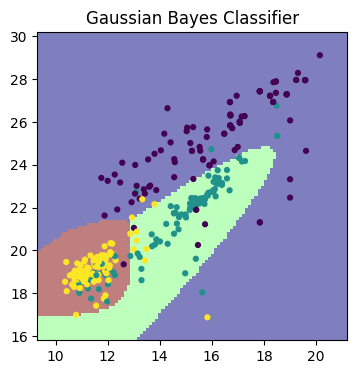

In [18]:
# Plot the decision boundary for your classifier

# Some keyword arguments for making nice looking plots.
plot_kwargs = {'cmap': 'jet',     # another option: viridis
               'response_method': 'predict',
               'plot_method': 'pcolormesh',
               'shading': 'auto',
               'alpha': 0.5,
               'grid_resolution': 100}

figure, axes = plt.subplots(1, 1, figsize=(4,4))

learner = GaussianBayesClassifier() 

### YOUR CODE STARTS HERE ###

nych_X2 =  nych_X[:, :2]      # get just the first two features of X
learner.fit(nych_X2, nych_y)  # Fit "learner" to nych 2-feature data

gbc_y_pred = learner.predict(nych_X2) # Use "learner" to predict on same data used in training
    
###  YOUR CODE ENDS HERE  ###

err = zero_one_loss(nych_y, gbc_y_pred)
print(f'Gaussian Bayes Error Rate (0/1): {err}')

DecisionBoundaryDisplay.from_estimator(learner, nych_X2, ax=axes, **plot_kwargs)
axes.scatter(nych_X2[:, 0], nych_X2[:, 1], c=nych_y, edgecolor=None, s=12)
axes.set_title(f'Gaussian Bayes Classifier');

### Problem 3.3 (5 points): Analysis
Did the error increase or decrease? Why do you think this is?

In [19]:
nc_classifier_2d = NearestCentroidClassifier()
nych_X2 = nych_X[:, :2] # Re-define the 2D data just in case
nc_classifier_2d.fit(nych_X2, nych_y)

nc_pred_2d = nc_classifier_2d.predict(nych_X2)
nc_err_2d = zero_one_loss(nych_y, nc_pred_2d)

print(f'Nearest Centroid (2D) Error Rate: {nc_err_2d:.4f}')
print(f'Gaussian Bayes (2D) Error Rate:   {err:.4f}')

Nearest Centroid (2D) Error Rate: 0.2700
Gaussian Bayes (2D) Error Rate:   0.1500


> The error decreased. I believe that because the Nearest Centroid Classifier only cares about distance to center, its decision boundaries are more rigid (straight lines). On the other hand, the Gaussian Basyes Classifier can produce curved decision boundaries that better fit the data.

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

## Problem 4: MNIST Data

Next, let us apply our learners to a higher-dimensional data set, the MNIST dataset.  The MNIST dataset is an image dataset consisting of 70,000 hand-written digits (from 0 to 9), each of which is a 28x28 grayscale image. For each image, we also have a label, corresponding to which digit is written. Run the following code cell to load the MNIST dataset:

In [20]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
mnist_X, mnist_y = fetch_openml('mnist_784', as_frame=False, return_X_y=True, parser='auto')

# Convert labels to integer data type
mnist_y = mnist_y.astype(int)

Each data point in the MNIST dataset is 768-dimensional, with each feature corresponding to a pixel intensity of a $28\times 28$ scan of a digit.  To visualize a data point, we can re-shape the feature vector into the shape of the image, and then display it using `imshow`:

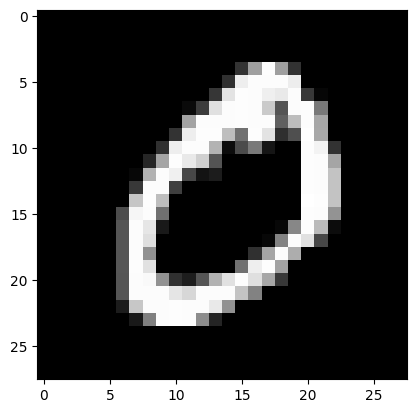

In [21]:
plt.imshow( mnist_X[1,:].reshape(28,28) ,cmap='gray');

### Problem 4.1 (5 points): Training on MNIST

First, let us train a nearest centroid classifier on the MNIST data.  For this problem, we will go ahead and use the scikit-learn implementation, just so that it's not dependent on your earlier problem solution.

In [22]:
mnist_nearest_centroid = NearestCentroid()

### YOUR CODE STARTS HERE ###
    
# fit mnist_nearest_centroid to your mnist data
mnist_nearest_centroid.fit(mnist_X, mnist_y)
    
###  YOUR CODE ENDS HERE  ###

/home/vincent/workplace/cs273a/.venv_jupyter/lib/python3.12/site-packages/sklearn/neighbors/_nearest_centroid.py:244: UserWarning: self.within_class_std_dev_ has at least 1 zero standard deviation.Inputs within the same classes for at least 1 feature are identical.
  warnings.warn(


,metric,'euclidean'
,shrink_threshold,None
,priors,'uniform'


### Problem 4.2 (5 points): Visualizing the centroids

If you look at the trained model with, say, ``dir(mnist_nearest_centroid)``, you will see that the centroids are stored in ``mnist_nearest_centroid.centroids_``.

Each centroid is a vector in the same 28 x 28 vector space as the original images.  So, we can visualize the centroid in the same way that we visualized a data point.  Run through all ten centroids and draw them (suing ``imshow``):

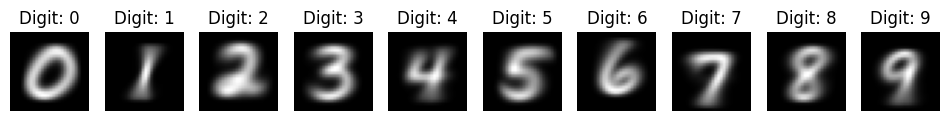

In [23]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 10, figsize=(12, 3))  

for i,c in enumerate(mnist_nearest_centroid.classes_):
    ### YOUR CODE STARTS HERE ###
    
    # display centroid for class c using axes[i].imshow()
    for i, centroid in enumerate(mnist_nearest_centroid.centroids_):
        image = centroid.reshape(28, 28)
        axes[i].imshow(image, cmap='gray')       
        axes[i].set_title(f'Digit: {i}')
        axes[i].axis('off')
    
    ###  YOUR CODE ENDS HERE  ###

### Problem 4.3 (10 points): MINST Error Rate and Confusion Matrix

Now, use ``scikit``'s functions to compute the error rate of your nearest centroid classifier, and also the confusion matrix.

Error Rate: 0.1905


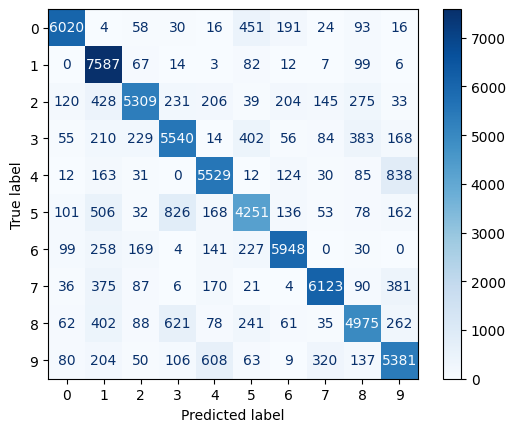

In [24]:
### YOUR CODE STARTS HERE ###

mnist_y_pred = mnist_nearest_centroid.predict(mnist_X)

error_rate = zero_one_loss(mnist_y, mnist_y_pred)

cm = confusion_matrix(mnist_y, mnist_y_pred)
print(f'Error Rate: {error_rate:.4f}')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');
plt.show()

###  YOUR CODE ENDS HERE  ###

Looking at the confusion matrix, what are some of the most common mistakes (true vs. predicted class)?  What are some uncommon mistakes?  Thinking about the data and task, do these make sense? (Are these reasonable classses to confuse?)

> Common mistakes:
> * 4 and 9
> * 5 and 3
> * 8 and 3
>
> Uncommon mistakes:
> * 1 and 0
> * 4 and 3
> * 6 and 7
> * 6 and 9
>
> The mistakes seem to make sense. 4 and 9 are closed numbers that, when written, may appear similar; the same can be said about 8 and 3. The classifier also rarely confuses numbers that look significantly different. Overall, it makes mistakes when numbers have similar structures and is increasingly accurate when numbers have more distinct structures.

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

(*Note: If you did not collaborate with anyone, you may simply state that.*)

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

> I did not collaborate with other students on this assignment.